# Highest 4s and 6s batsman 

In [35]:
%config IPCompleter.greedy=True

In [36]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd

In [37]:
cricket = pd.read_excel('C:/Users/sinpriya/Downloads/Prashant Upgrad/Cricket/Master Data.xlsx')
cricket.head()

,S.N.,Players,category,M,Inn,NO,Runs,HS,Avg,BF,SR,100,200,50,4s,6s
0,1,Rohit Sharma,Batsman,201,195,31,7808,264,47.61,8840,88.33,22,3,39,681,215
1,2,Sikhar Dhawan,Batsman,123,122,7,5178,137,45.03,5539,93.48,15,0,27,642,64
2,3,Virat Kohli,Captain,222,214,37,10533,183,59.51,11376,92.59,39,0,49,984,115
3,4,Ambati Rayudu,Batsman,52,47,14,1661,124,50.33,2084,79.70,3,0,10,141,30
4,5,Lokesh Rahul,Batsman,13,12,3,317,100,35.22,393,80.66,1,0,2,25,5


In [38]:
cricket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 16 columns):
S.N.        31 non-null int64
Players     31 non-null object
category    31 non-null object
M           31 non-null int64
Inn         31 non-null int64
NO          31 non-null int64
Runs        31 non-null int64
HS          31 non-null int64
Avg         31 non-null float64
BF          31 non-null int64
SR          31 non-null float64
100         31 non-null int64
200         31 non-null int64
50          31 non-null int64
4s          31 non-null int64
6s          31 non-null int64
dtypes: float64(2), int64(12), object(2)
memory usage: 4.0+ KB


As we can see thats 6s column has dtype is float so need to change in int dtyp

In [39]:
cricket.describe()

,S.N.,M,Inn,NO,Runs,HS,Avg,BF,SR,100,200,50,4s,6s
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,16.000000,57.451613,45.322581,8.774194,1572.935484,73.967742,25.977742,1745.032258,82.694194,3.580645,0.096774,8.516129,144.387097,29.870968
std,9.092121,75.321462,69.685191,15.976461,2941.064228,64.826170,16.901683,3267.520563,26.181330,8.401485,0.538816,16.564764,265.188446,57.802389
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.500000,10.000000,6.000000,1.000000,53.500000,23.000000,11.595000,65.000000,72.285000,0.000000,0.000000,0.000000,5.500000,0.500000
50%,16.000000,39.000000,15.000000,3.000000,246.000000,47.000000,27.670000,295.000000,83.840000,0.000000,0.000000,0.000000,20.000000,3.000000
75%,23.500000,61.000000,47.000000,9.000000,1331.500000,111.000000,39.455000,1425.500000,98.440000,1.500000,0.000000,7.500000,122.500000,31.500000
max,31.000000,338.000000,286.000000,81.000000,10533.000000,264.000000,59.510000,11877.000000,132.260000,39.000000,3.000000,70.000000,984.000000,222.000000


In [40]:
cricket.shape

(31, 16)

In [41]:
cricket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 16 columns):
S.N.        31 non-null int64
Players     31 non-null object
category    31 non-null object
M           31 non-null int64
Inn         31 non-null int64
NO          31 non-null int64
Runs        31 non-null int64
HS          31 non-null int64
Avg         31 non-null float64
BF          31 non-null int64
SR          31 non-null float64
100         31 non-null int64
200         31 non-null int64
50          31 non-null int64
4s          31 non-null int64
6s          31 non-null int64
dtypes: float64(2), int64(12), object(2)
memory usage: 4.0+ KB


From india Team Sidharth Kaul has not taken because he has less experience in ODI so unable to collect data

In [42]:
df=cricket[['Players','6s','4s']]
df.shape

(31, 3)

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
numeric_df= df.copy()
s_scalar=StandardScaler(copy=True)
numeric_df[['4s','6s']]=s_scalar.fit_transform(numeric_df[['4s','6s']])
numeric_df

,Players,6s,4s
0,Rohit Sharma,3.255734,2.056964
1,Sikhar Dhawan,0.600203,1.907468
2,Virat Kohli,1.497105,3.218435
3,Ambati Rayudu,0.002269,-0.012984
4,Lokesh Rahul,-0.437388,-0.457639
5,Rishab Pant,-0.507733,-0.534304
6,MS dhoni,3.378838,2.505453
7,Kedar Jadhav,-0.208766,-0.154813
8,Hardik pandya,0.107787,-0.369475
9,Vijay Sankar,-0.525320,-0.538137


In [44]:
kmeans = KMeans(n_clusters=6,random_state=100).fit(numeric_df[['4s','6s']])

In [45]:
kmeans.labels_

array([1, 2, 4, 0, 3, 3, 1, 0, 0, 3, 3, 3, 3, 3, 3, 5, 3, 3, 0, 3, 3, 3,
       5, 3, 3, 3, 3, 3, 3, 3, 3])

In [46]:
cricket_cluster = pd.concat([numeric_df, pd.Series(kmeans.labels_)], axis=1)

In [47]:
cricket_cluster.rename(columns={0:'cluster_id'},inplace=True)

In [48]:
cricket_cluster[cricket_cluster['cluster_id']==0]

,Players,6s,4s,cluster_id
3,Ambati Rayudu,0.002269,-0.012984,0
7,Kedar Jadhav,-0.208766,-0.154813,0
8,Hardik pandya,0.107787,-0.369475,0
18,Shaun Marsh,0.055028,0.335841,0


In [49]:
cricket_cluster[cricket_cluster['cluster_id']==1]

,Players,6s,4s,cluster_id
0,Rohit Sharma,3.255734,2.056964,1
6,MS dhoni,3.378838,2.505453,1


In [50]:
cricket_cluster[cricket_cluster['cluster_id']==2]

,Players,6s,4s,cluster_id
1,Sikhar Dhawan,0.600203,1.907468,2


In [51]:
cricket_cluster[cricket_cluster['cluster_id']==3]

,Players,6s,4s,cluster_id
4,Lokesh Rahul,-0.437388,-0.457639,3
5,Rishab Pant,-0.507733,-0.534304,3
9,Vijay Sankar,-0.525320,-0.538137,3
10,Kuldeep Yadav,-0.525320,-0.530470,3
11,Mohmmed Shami,-0.419802,-0.522804,3
12,Jasprit Bumrah,-0.525320,-0.545803,3
13,Yuzevendra Chahal,-0.525320,-0.534304,3
14,Bhuvneshwar Kumar,-0.419802,-0.396307,3
16,Alex Carey,-0.490147,-0.457639,3
17,Usman Khawaja,-0.384629,-0.346475,3


In [52]:
cricket_cluster[cricket_cluster['cluster_id']==4]

,Players,6s,4s,cluster_id
2,Virat Kohli,1.497105,3.218435,4


In [53]:
cricket_cluster[cricket_cluster['cluster_id']==5]

,Players,6s,4s,cluster_id
15,Aron Finch,0.811239,0.811162,5
22,Glenn Maxwell,0.776066,0.339674,5


C:\Users\sinpriya\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


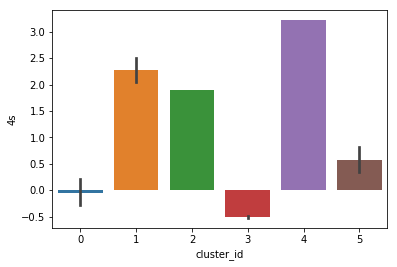

In [56]:
%matplotlib inline
sns.barplot(x=cricket_cluster.cluster_id, y=cricket_cluster['4s'])

C:\Users\sinpriya\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


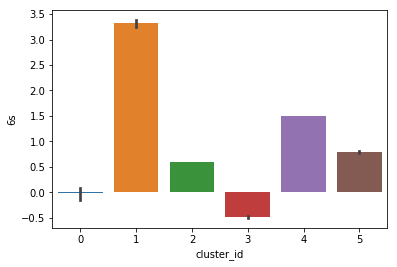

In [58]:
sns.barplot(x=cricket_cluster.cluster_id, y=cricket_cluster['6s'])

In [59]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
import matplotlib.pyplot as plt

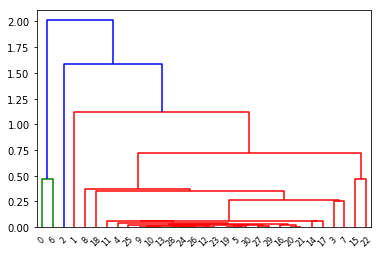

In [61]:
mergings = linkage(numeric_df[['4s','6s']], method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

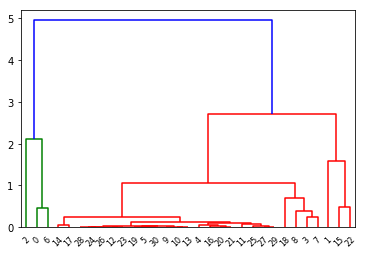

In [62]:
mergings = linkage(numeric_df[['4s','6s']], method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [72]:
clusterCut_TT = pd.Series(cut_tree(mergings, n_clusters = 6).reshape(-1,))
cricket_cluster_cut = pd.concat([numeric_df, clusterCut_TT], axis=1)


In [73]:
cricket_cluster_cut[cricket_cluster_cut[0]==0]

,Players,6s,4s,0
0,Rohit Sharma,3.255734,2.056964,0
6,MS dhoni,3.378838,2.505453,0


In [74]:
cricket_cluster_cut[cricket_cluster_cut[0]==1]

,Players,6s,4s,0
1,Sikhar Dhawan,0.600203,1.907468,1


In [75]:
cricket_cluster_cut[cricket_cluster_cut[0]==2]

,Players,6s,4s,0
2,Virat Kohli,1.497105,3.218435,2


In [76]:
cricket_cluster_cut[cricket_cluster_cut[0]==3]

,Players,6s,4s,0
3,Ambati Rayudu,0.002269,-0.012984,3
7,Kedar Jadhav,-0.208766,-0.154813,3
8,Hardik pandya,0.107787,-0.369475,3
18,Shaun Marsh,0.055028,0.335841,3


In [77]:
cricket_cluster_cut[cricket_cluster_cut[0]==4]

,Players,6s,4s,0
4,Lokesh Rahul,-0.437388,-0.457639,4
5,Rishab Pant,-0.507733,-0.534304,4
9,Vijay Sankar,-0.525320,-0.538137,4
10,Kuldeep Yadav,-0.525320,-0.530470,4
11,Mohmmed Shami,-0.419802,-0.522804,4
12,Jasprit Bumrah,-0.525320,-0.545803,4
13,Yuzevendra Chahal,-0.525320,-0.534304,4
14,Bhuvneshwar Kumar,-0.419802,-0.396307,4
16,Alex Carey,-0.490147,-0.457639,4
17,Usman Khawaja,-0.384629,-0.346475,4


In [78]:
cricket_cluster_cut[cricket_cluster_cut[0]==5]

,Players,6s,4s,0
15,Aron Finch,0.811239,0.811162,5
22,Glenn Maxwell,0.776066,0.339674,5


In [79]:
clusterCut_t = cut_tree(mergings, n_clusters = 6)

In [80]:
ClusterID=pd.Series(clusterCut_t.reshape(-1,))
cricket_cluster_merge = pd.concat([numeric_df, ClusterID], axis=1)

In [81]:
print(len(cricket_cluster_cut[cricket_cluster_cut[0]==0]))
print(len(cricket_cluster_cut[cricket_cluster_cut[0]==1]))
print(len(cricket_cluster_cut[cricket_cluster_cut[0]==2]))
print(len(cricket_cluster_cut[cricket_cluster_cut[0]==3]))
print(len(cricket_cluster_cut[cricket_cluster_cut[0]==4]))
print(len(cricket_cluster_cut[cricket_cluster_cut[0]==5]))

2
1
1
4
21
2


As we can see that highest virat kohli will gain the highest 4th which is shown in cluster 4.

And highest 6 holder will be Ms dhoni and 2nd runner up will be Rohit Sharma.